# HCPC - poison

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [17]:
from scientisttools import load_poison
poison = load_poison()
poison.head(6)

,Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
rownames,,,,,,,,,,,,,,,
1,9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
2,5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
3,6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
4,9,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_n,Courg_y,Cheese_y,Icecream_y
5,7,14,Sick_y,M,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
6,72,9,Sick_y,M,Nausea_n,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_n,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [18]:
from scientisttools import MCA
res_mca = MCA(n_components=5,quali_sup = [2,3],quanti_sup =[0,1])
res_mca.fit(poison)

MCA(quali_sup=[2, 3], quanti_sup=[0, 1])

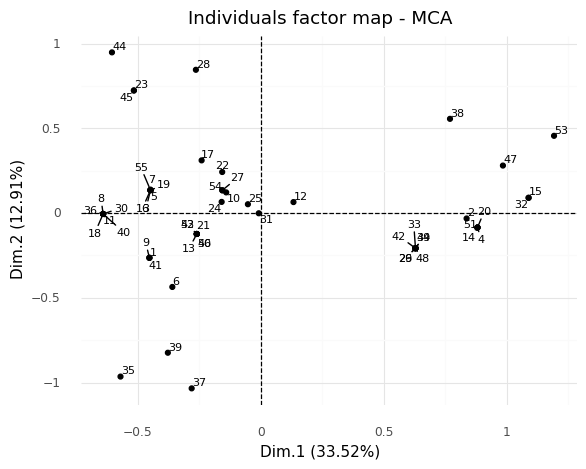

In [19]:
from scientisttools import fviz_mca_ind
p = fviz_mca_ind(res_mca,repel=True,ind_sup=False)
print(p)

In [20]:
from scientisttools import HCPC
res_hcpc = HCPC(res_mca,n_clusters=3)

## Description of qualitatives variables

In [21]:
desc_var = res_hcpc.desc_var_
desc_var.keys()

dict_keys(['quanti_var', 'quanti', 'test_chi2', 'category', 'call'])

### Description of qualitatives variables in overall cluster

In [22]:
quali_var = desc_var["category"]
quali_var["1"]

,Class/Mod,Mod/Class,Global,pvalue,vtest
Sick=Sick_y,92.105263,100.000000,69.090909,7.924639e-11,6.502024
Fever=Fever_y,94.285714,94.285714,63.636364,5.876439e-10,6.193710
Abdominals=Abdo_y,91.891892,97.142857,67.272727,6.077678e-10,6.188403
Diarrhae=Diarrhea_y,91.428571,91.428571,63.636364,1.950559e-08,5.616330
Vomiting=Vomit_y,100.000000,62.857143,40.000000,5.744712e-06,4.535574
Mayo=Mayo_y,73.333333,94.285714,81.818182,1.676047e-03,3.142338
Potato=Potato_y,67.307692,100.000000,94.545455,1.954680e-02,2.334935
Cheese=Cheese_y,68.750000,94.285714,87.272727,4.079979e-02,2.045559
Cheese=Cheese_n,28.571429,5.714286,12.727273,4.079979e-02,-2.045559
Potato=Potato_n,0.000000,0.000000,5.454545,1.954680e-02,-2.334935


In [23]:
quali_var["2"]

,Class/Mod,Mod/Class,Global,pvalue,vtest
Sick=Sick_n,100.000000,100.000000,30.909091,2.005063e-13,7.348469
Abdominals=Abdo_n,94.444444,100.000000,32.727273,1.830314e-12,7.046836
Fever=Fever_n,85.000000,100.000000,36.363636,7.924639e-11,6.502024
Diarrhae=Diarrhea_n,85.000000,100.000000,36.363636,7.924639e-11,6.502024
Vomiting=Vomit_n,51.515152,100.000000,60.000000,5.991729e-05,4.013136
Mayo=Mayo_n,80.000000,47.058824,18.181818,2.333091e-04,3.679918
Nausea=Nausea_n,39.534884,100.000000,78.181818,9.418282e-03,2.596486
Cheese=Cheese_n,71.428571,29.411765,12.727273,1.387168e-02,2.460569
Cheese=Cheese_y,25.000000,70.588235,87.272727,1.387168e-02,-2.460569
Nausea=Nausea_y,0.000000,0.000000,21.818182,9.418282e-03,-2.596486


In [24]:
quali_var["3"]

,Class/Mod,Mod/Class,Global,pvalue,vtest
Potato=Potato_n,100.0,100.0,5.454545,2.005063e-13,7.348469
Potato=Potato_y,0.0,0.0,94.545455,2.005063e-13,-7.348469


### Chi2  test

In [25]:
test_chi2 = desc_var["test_chi2"]
test_chi2

,statistic,dof,pvalue
Sick,55.000000,2,1.139992e-12
Potato,55.000000,2,1.139992e-12
Abdominals,50.587731,2,1.035175e-11
Fever,43.970068,2,2.831529e-10
Diarrhae,43.146939,2,4.273279e-10
Vomiting,20.952381,2,2.819995e-05
Mayo,13.853221,2,9.813213e-04
Nausea,9.217423,2,9.964647e-03
Cheese,6.247749,2,4.398641e-02


In [26]:
desc_var["quanti_var"]

,R2,pvalue
Time,0.773749,1.657033e-17


In [27]:
desc_var["quanti"] ["1"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Time,5.75952,14.742857,10.163636,4.550308,7.728962,8.435345e-09


In [28]:
desc_var["quanti"] ["2"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Time,-6.463347,0.0,10.163636,0.0,7.728962,1.024121e-10


In [29]:
desc_var["quanti"] ["3"]